In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:/FINAL PROJECT/the project/Global_Superstore2.csv', encoding='latin-1')

# EDA

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.shape

(51290, 24)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
columns_to_group = ['City', 'State', 'Country']
for col in columns_to_group:
    value_counts = df[col].value_counts()
    to_replace = value_counts[value_counts <= 20].index
    df[col] = df[col].replace(to_replace, 'other')

df[columns_to_group].head()

,City,State,Country
0,New York City,New York,United States
1,Wollongong,New South Wales,Australia
2,Brisbane,Queensland,Australia
3,Berlin,Berlin,Germany
4,Dakar,Dakar,Senegal


In [11]:
df[['Segment','Ship Mode','City','State','Country','Region','Category',	'Sub-Category','Product Name']].nunique()

Segment            3
Ship Mode          4
City             511
State            437
Country          111
Region            13
Category           3
Sub-Category      17
Product Name    3788
dtype: int64

In [12]:
columns_to_count = ['Segment','Ship Mode','City','State','Country','Region','Category', 'Sub-Category','Product Name','Order Priority']

for col in columns_to_count:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64
------------------------------
Value counts for column: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64
------------------------------
Value counts for column: City
City
other                18809
New York City          915
Los Angeles            747
Philadelphia           537
San Francisco          510
                     ...  
San Fernando            21
Albury                  21
Bom Jesus da Lapa       21
Pekanbaru               21
Hamm                    21
Name: count, Length: 511, dtype: int64
------------------------------
Value counts for column: State
State
other          4991
California     2001
England        1499
New York       1128
Texas           985
               ... 
Borno            21
Markazi          21
Idaho            21
Cross River      21
No

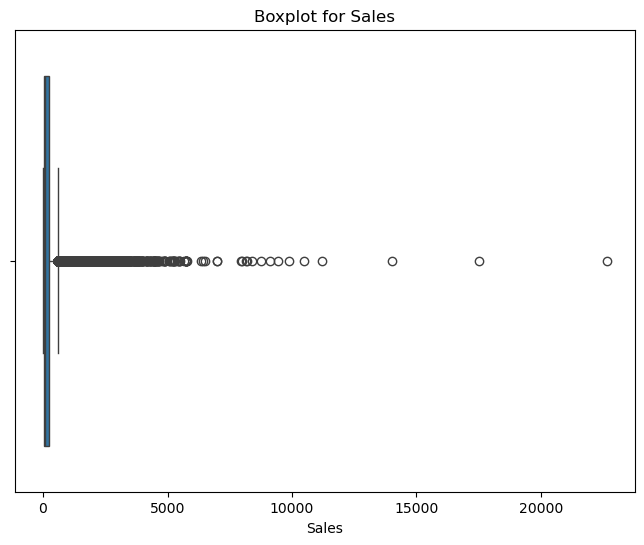

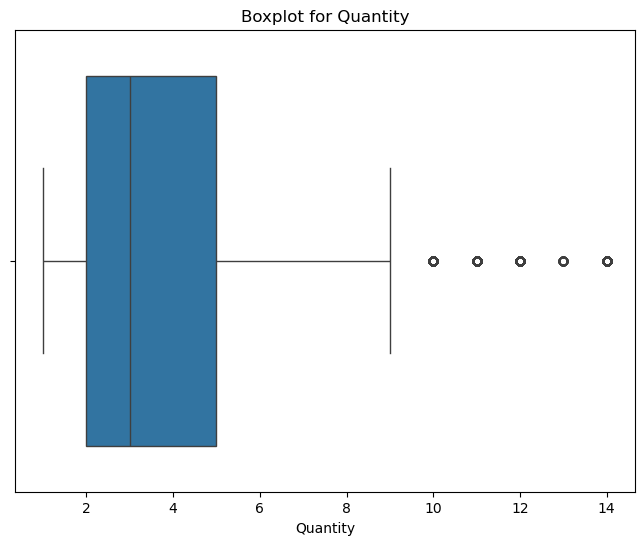

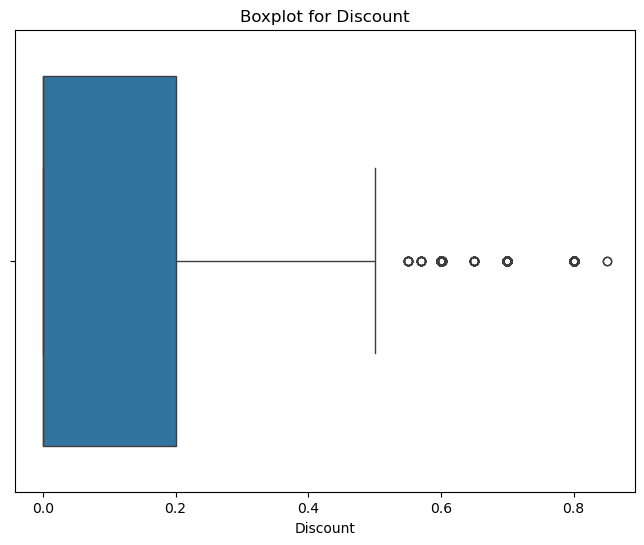

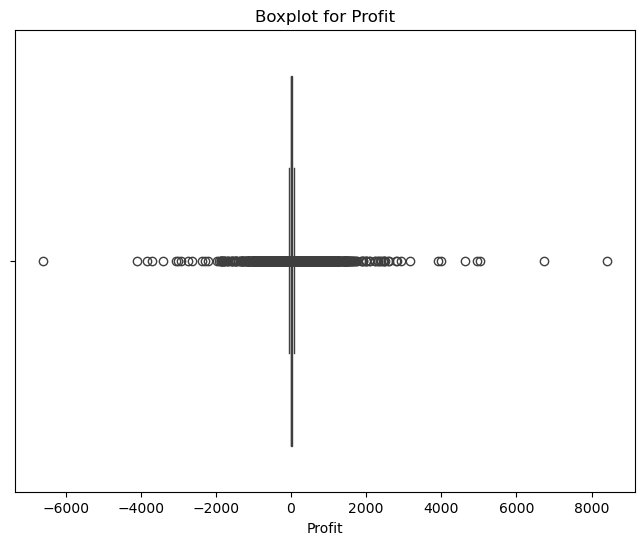

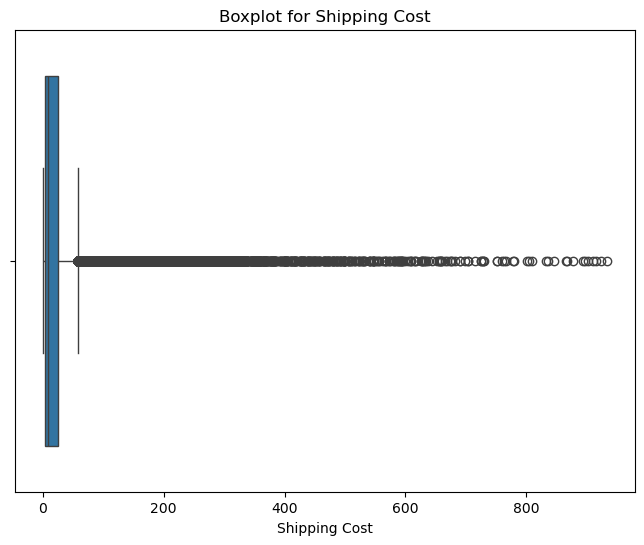

In [13]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

# **Delete unnecessary columns**

In [14]:
df.drop(['Postal Code','Row ID','Order ID','Customer ID','Customer Name','Product ID'],axis=1,inplace=True)
#All of these values ​​will not be used by the machine during the learning process.
#postal code have many null value and not necessary beacause we have city , country and state columns and it's enough for learning.

In [15]:
df.shape

(51290, 18)

# **Data Preprocessing**

In [16]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

C:\Users\ENG_MOAZ\AppData\Local\Temp\ipykernel_25836\3949181741.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date']=pd.to_datetime(df['Order Date'])
C:\Users\ENG_MOAZ\AppData\Local\Temp\ipykernel_25836\3949181741.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date']=pd.to_datetime(df['Ship Date'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Ship Date       51290 non-null  datetime64[ns]
 2   Ship Mode       51290 non-null  object        
 3   Segment         51290 non-null  object        
 4   City            51290 non-null  object        
 5   State           51290 non-null  object        
 6   Country         51290 non-null  object        
 7   Market          51290 non-null  object        
 8   Region          51290 non-null  object        
 9   Category        51290 non-null  object        
 10  Sub-Category    51290 non-null  object        
 11  Product Name    51290 non-null  object        
 12  Sales           51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Discount        51290 non-null  float64       
 15  Pr

In [18]:
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [19]:
df.duplicated().sum()

1

<Axes: xlabel='Sales', ylabel='Count'>

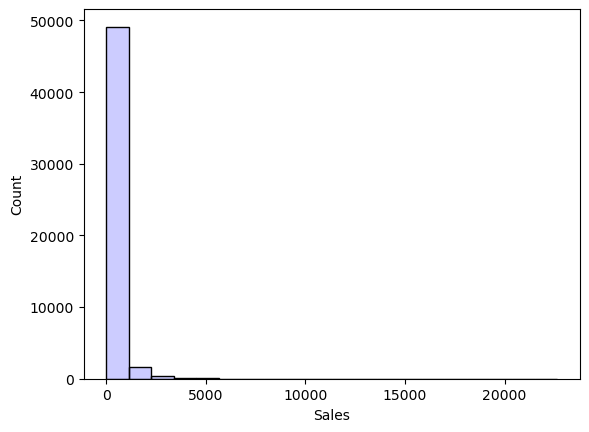

In [20]:
sns.histplot(df['Sales'],bins=20,color='blue',edgecolor='black',alpha=0.2)

In [21]:
df['Sales']=np.log1p(df['Sales'])

<Axes: xlabel='Sales', ylabel='Count'>

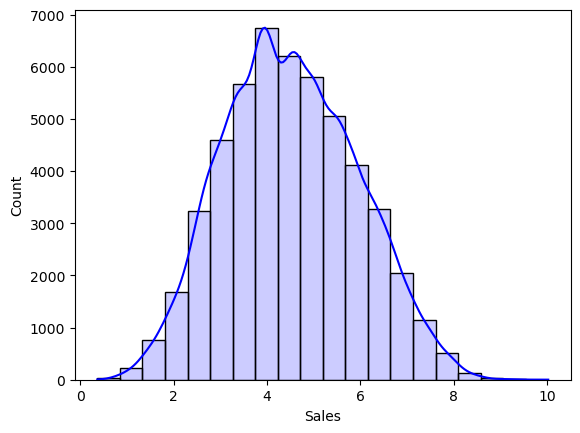

In [22]:
sns.histplot(df['Sales'],bins=20,color='blue',edgecolor='black',alpha=0.2,kde=True)

<Axes: xlabel='Shipping Cost', ylabel='Count'>

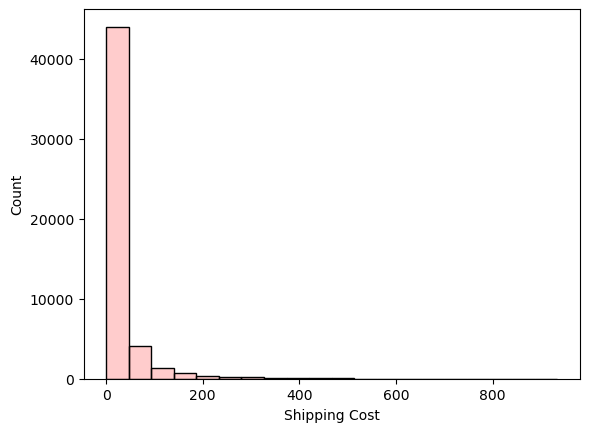

In [23]:
sns.histplot(df['Shipping Cost'],bins=20,color='red',edgecolor='black',alpha=0.2)

In [24]:
df['Shipping Cost']=np.log1p(df['Shipping Cost'])

<Axes: xlabel='Shipping Cost', ylabel='Count'>

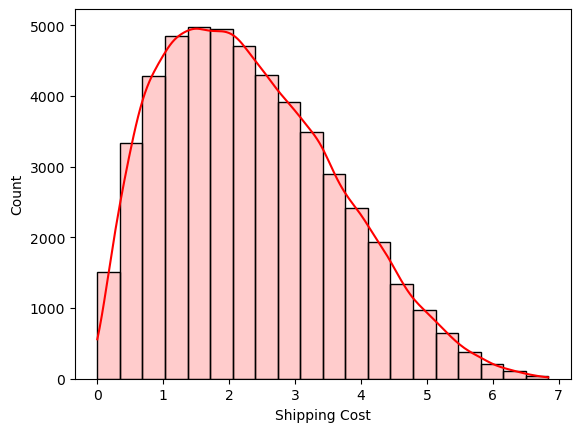

In [25]:
sns.histplot(df['Shipping Cost'],bins=20,color='red',edgecolor='black',alpha=0.2,kde=True)

<Axes: xlabel='Profit', ylabel='Count'>

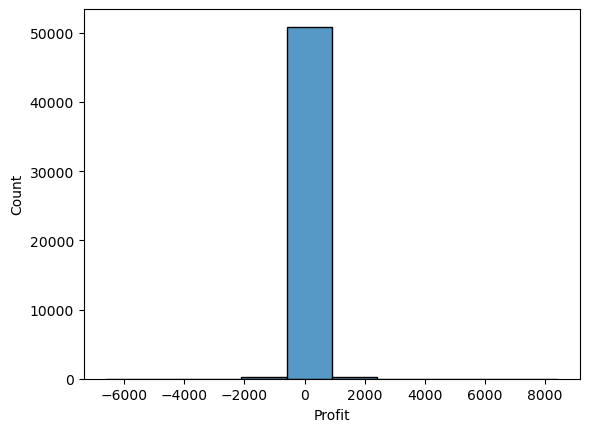

In [26]:
sns.histplot(df['Profit'],bins=10)

In [27]:
col = 'Profit'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"  Lower Bound ({col}): {lower_bound}")
print(f"  Upper Bound ({col}): {upper_bound}")

df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


  Lower Bound (Profit): -55.215
  Upper Bound (Profit): 92.025


<Axes: xlabel='Profit', ylabel='Count'>

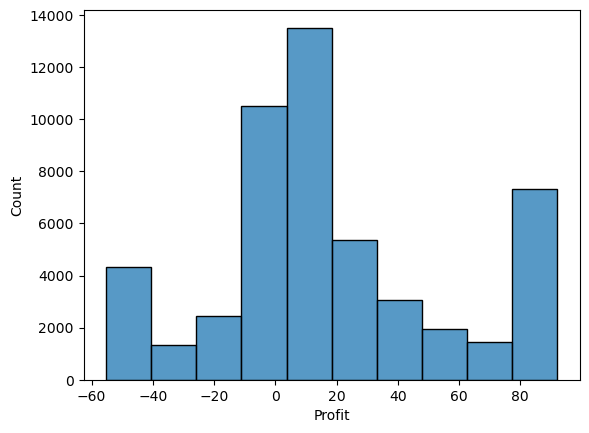

In [28]:
sns.histplot(df['Profit'],bins=10)

<Axes: xlabel='Discount', ylabel='Count'>

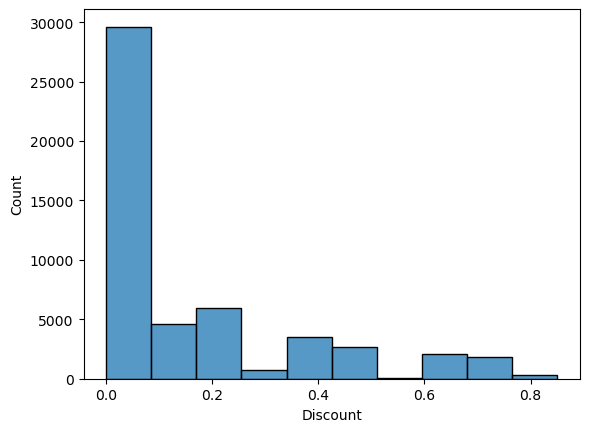

In [29]:
sns.histplot(df['Discount'],bins=10)

In [30]:
col = 'Discount'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"  Lower Bound ({col}): {lower_bound}")
print(f"  Upper Bound ({col}): {upper_bound}")

df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)



  Lower Bound (Discount): -0.30000000000000004
  Upper Bound (Discount): 0.5


<Axes: xlabel='Discount', ylabel='Count'>

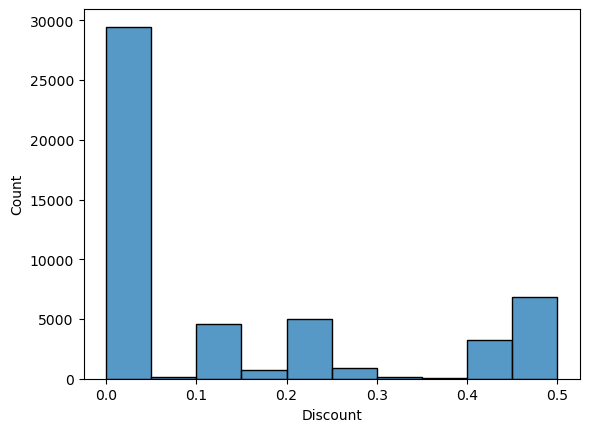

In [31]:
sns.histplot(df['Discount'],bins=10)

## Feature Engineering

In [32]:
df['shipping_duration']=(df['Ship Date']-df['Order Date']).dt.days

**Nominal columns**

In [33]:
test_df=df
test_df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,shipping_duration
0,2012-07-31,2012-07-31,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,7.745284,7,0.0,92.0250,6.840087,Critical,0
1,2013-02-05,2013-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",8.218894,9,0.1,-55.2150,6.829394,Critical,2
2,2013-10-17,2013-10-18,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",8.551821,9,0.1,92.0250,6.820551,Medium,1
3,2013-01-28,2013-01-30,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",7.970226,5,0.1,-55.2150,6.814719,Medium,2
4,2013-11-05,2013-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",7.949430,8,0.0,92.0250,6.806874,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Corporate,other,other,Japan,APAC,North Asia,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",4.191169,5,0.0,4.5000,0.009950,Medium,0
51286,2014-06-20,2014-06-24,Standard Class,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.367417,1,0.5,-1.1100,0.009950,Medium,4
51287,2013-12-02,2013-12-02,Same Day,Home Office,other,California,United States,US,West,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",3.174715,3,0.0,11.2308,0.009950,High,0
51288,2012-02-18,2012-02-22,Standard Class,Home Office,other,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,"Acco Index Tab, Economy",2.670002,2,0.0,2.4000,0.000000,Medium,4


In [34]:
df_encode=pd.get_dummies(test_df[['Segment','Ship Mode','Region','Category','Sub-Category']])

In [35]:
df_encode

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_Africa,Region_Canada,Region_Caribbean,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
51286,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
51288,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
!pip install category_encoders

In [37]:
from category_encoders import BinaryEncoder

In [38]:
bin=BinaryEncoder(cols=['City','State','Country'])
bin_encode=bin.fit_transform(test_df)
bin_encode

,Order Date,Ship Date,Ship Mode,Segment,City_0,City_1,City_2,City_3,City_4,City_5,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,shipping_duration
0,2012-07-31,2012-07-31,Same Day,Consumer,0,0,0,0,0,0,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,7.745284,7,0.0,92.0250,6.840087,Critical,0
1,2013-02-05,2013-02-07,Second Class,Corporate,0,0,0,0,0,0,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",8.218894,9,0.1,-55.2150,6.829394,Critical,2
2,2013-10-17,2013-10-18,First Class,Consumer,0,0,0,0,0,0,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",8.551821,9,0.1,92.0250,6.820551,Medium,1
3,2013-01-28,2013-01-30,First Class,Home Office,0,0,0,0,0,0,...,Technology,Phones,"Motorola Smart Phone, Cordless",7.970226,5,0.1,-55.2150,6.814719,Medium,2
4,2013-11-05,2013-11-06,Same Day,Consumer,0,0,0,0,0,0,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",7.949430,8,0.0,92.0250,6.806874,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Corporate,0,0,0,0,0,1,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",4.191169,5,0.0,4.5000,0.009950,Medium,0
51286,2014-06-20,2014-06-24,Standard Class,Consumer,0,0,1,0,0,1,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.367417,1,0.5,-1.1100,0.009950,Medium,4
51287,2013-12-02,2013-12-02,Same Day,Home Office,0,0,0,0,0,1,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",3.174715,3,0.0,11.2308,0.009950,High,0
51288,2012-02-18,2012-02-22,Standard Class,Home Office,0,0,0,0,0,1,...,Office Supplies,Binders,"Acco Index Tab, Economy",2.670002,2,0.0,2.4000,0.000000,Medium,4


**Ordinal Columns**

In [39]:
bin_encode['lb_Order Priority']=bin_encode['Order Priority'].map({"Low":0,
                                                    "Medium":1,
                                                    "High":2,
                                                    "Critical":3
                                                    })

In [40]:
bin_encode

,Order Date,Ship Date,Ship Mode,Segment,City_0,City_1,City_2,City_3,City_4,City_5,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,shipping_duration,lb_Order Priority
0,2012-07-31,2012-07-31,Same Day,Consumer,0,0,0,0,0,0,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,7.745284,7,0.0,92.0250,6.840087,Critical,0,3
1,2013-02-05,2013-02-07,Second Class,Corporate,0,0,0,0,0,0,...,Chairs,"Novimex Executive Leather Armchair, Black",8.218894,9,0.1,-55.2150,6.829394,Critical,2,3
2,2013-10-17,2013-10-18,First Class,Consumer,0,0,0,0,0,0,...,Phones,"Nokia Smart Phone, with Caller ID",8.551821,9,0.1,92.0250,6.820551,Medium,1,1
3,2013-01-28,2013-01-30,First Class,Home Office,0,0,0,0,0,0,...,Phones,"Motorola Smart Phone, Cordless",7.970226,5,0.1,-55.2150,6.814719,Medium,2,1
4,2013-11-05,2013-11-06,Same Day,Consumer,0,0,0,0,0,0,...,Copiers,"Sharp Wireless Fax, High-Speed",7.949430,8,0.0,92.0250,6.806874,Critical,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Corporate,0,0,0,0,0,1,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",4.191169,5,0.0,4.5000,0.009950,Medium,0,1
51286,2014-06-20,2014-06-24,Standard Class,Consumer,0,0,1,0,0,1,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.367417,1,0.5,-1.1100,0.009950,Medium,4,1
51287,2013-12-02,2013-12-02,Same Day,Home Office,0,0,0,0,0,1,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",3.174715,3,0.0,11.2308,0.009950,High,0,2
51288,2012-02-18,2012-02-22,Standard Class,Home Office,0,0,0,0,0,1,...,Binders,"Acco Index Tab, Economy",2.670002,2,0.0,2.4000,0.000000,Medium,4,1


In [41]:
test=pd.concat([bin_encode,df_encode],axis=1)

In [42]:
test

,Order Date,Ship Date,Ship Mode,Segment,City_0,City_1,City_2,City_3,City_4,City_5,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2012-07-31,2012-07-31,Same Day,Consumer,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2013-02-05,2013-02-07,Second Class,Corporate,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2013-10-17,2013-10-18,First Class,Consumer,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,2013-01-28,2013-01-30,First Class,Home Office,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,2013-11-05,2013-11-06,Same Day,Consumer,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Corporate,0,0,0,0,0,1,...,False,True,False,False,False,False,False,False,False,False
51286,2014-06-20,2014-06-24,Standard Class,Consumer,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
51287,2013-12-02,2013-12-02,Same Day,Home Office,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,False,False
51288,2012-02-18,2012-02-22,Standard Class,Home Office,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [43]:
test.drop(['Order Date', 'Ship Date', 'Ship Mode', 'Segment','Market', 'Region',
       'Category', 'Sub-Category', 'Product Name','Order Priority'],axis=1,inplace=True)

In [44]:
# Keep encoded features as numeric without forcing them to integers
numeric_cols = test.select_dtypes(include=['float64', 'float32']).columns
category_cols = test.columns.difference(numeric_cols)

test[category_cols] = test[category_cols].astype(int)
test.head()

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,State_0,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test.columns

Index(['City_0', 'City_1', 'City_2', 'City_3', 'City_4', 'City_5', 'City_6',
       'City_7', 'City_8', 'State_0', 'State_1', 'State_2', 'State_3',
       'State_4', 'State_5', 'State_6', 'State_7', 'State_8', 'Country_0',
       'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5',
       'Country_6', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'shipping_duration', 'lb_Order Priority', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Sub-Category_Accessories',
       'Sub-Catego

## Visualization

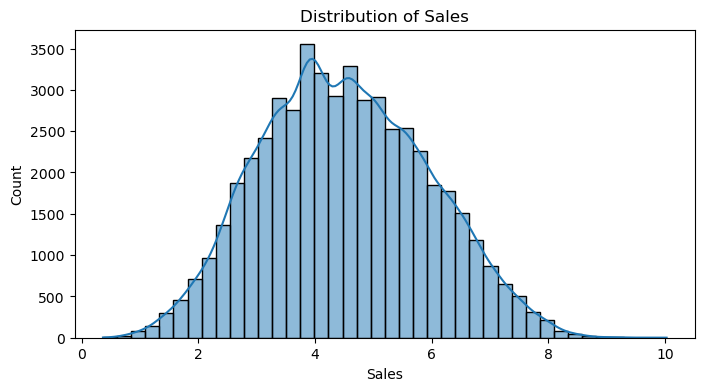

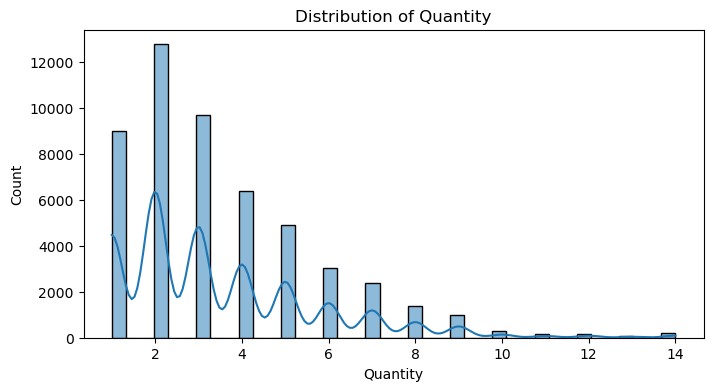

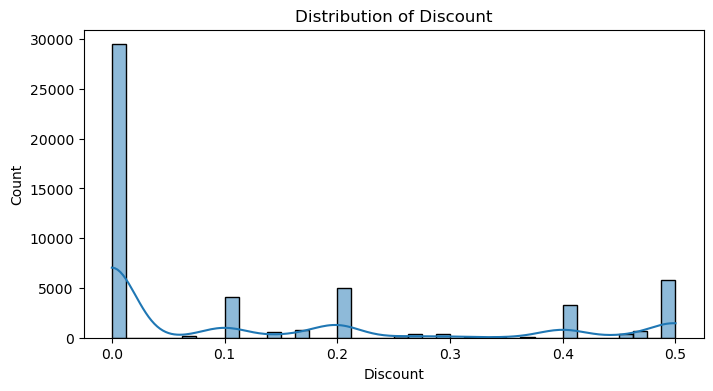

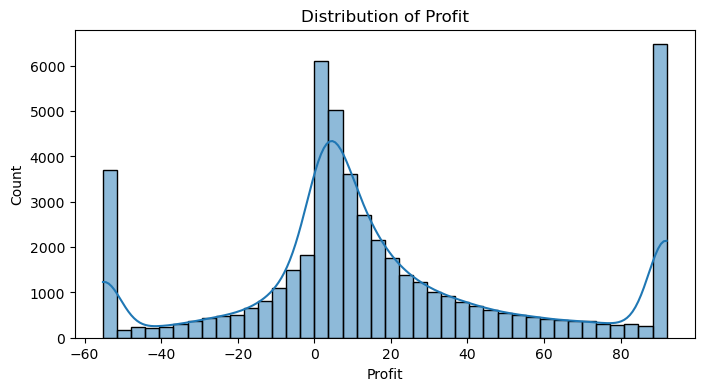

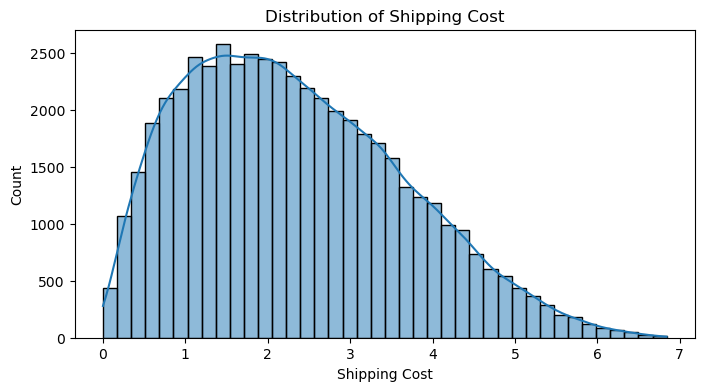

In [46]:
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()

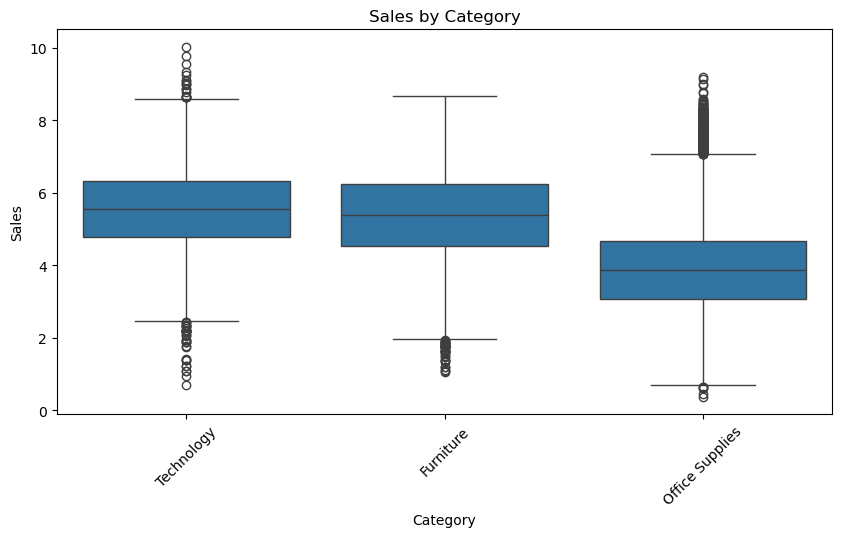

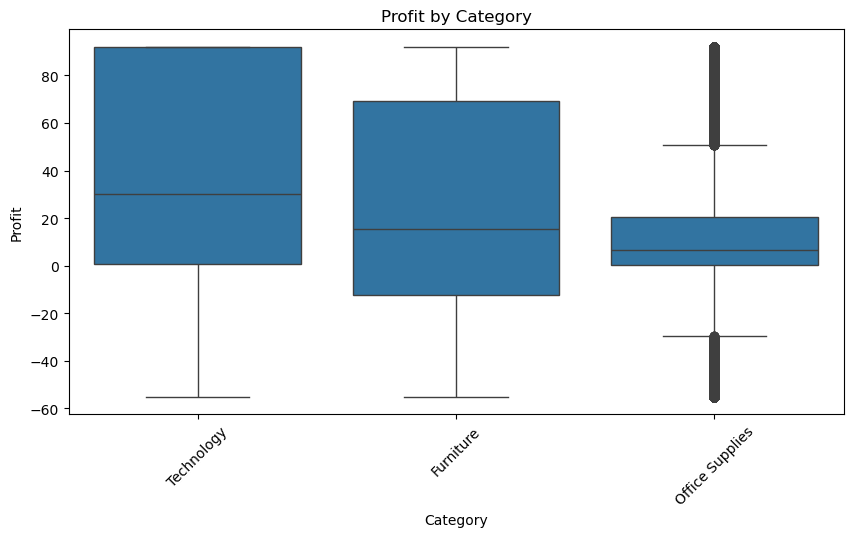

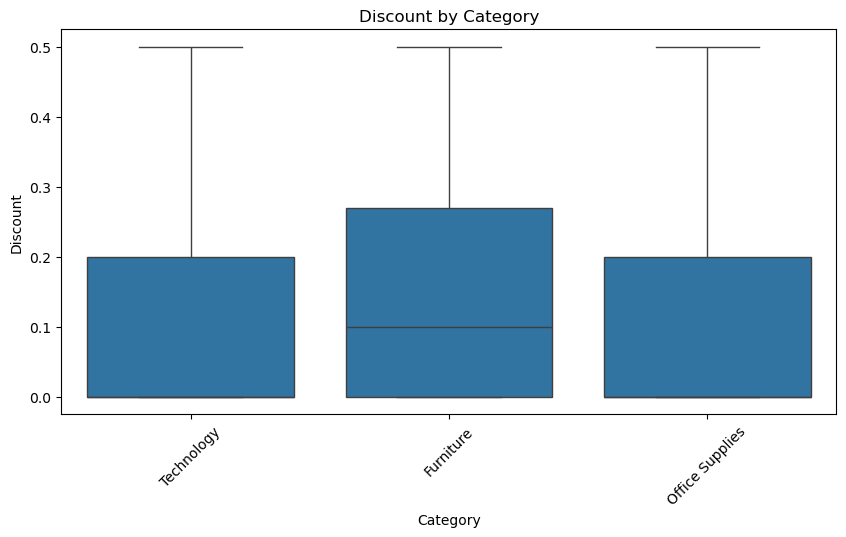

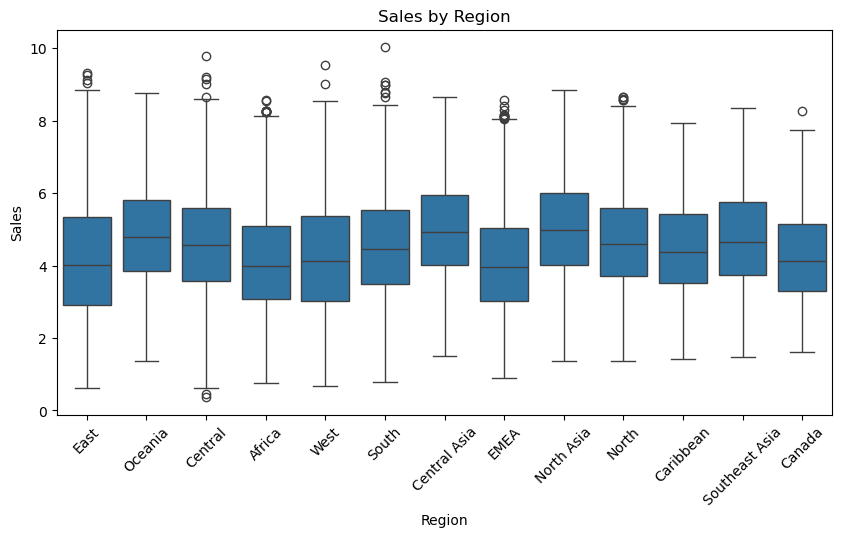

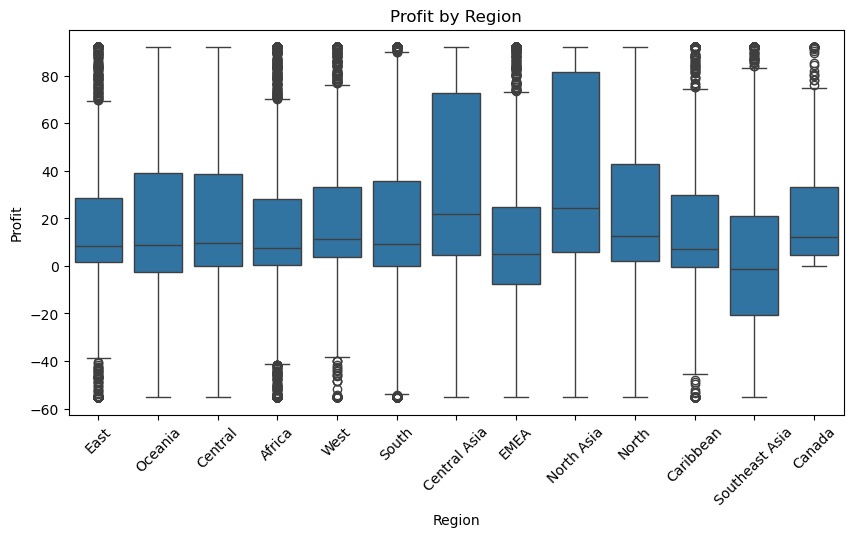

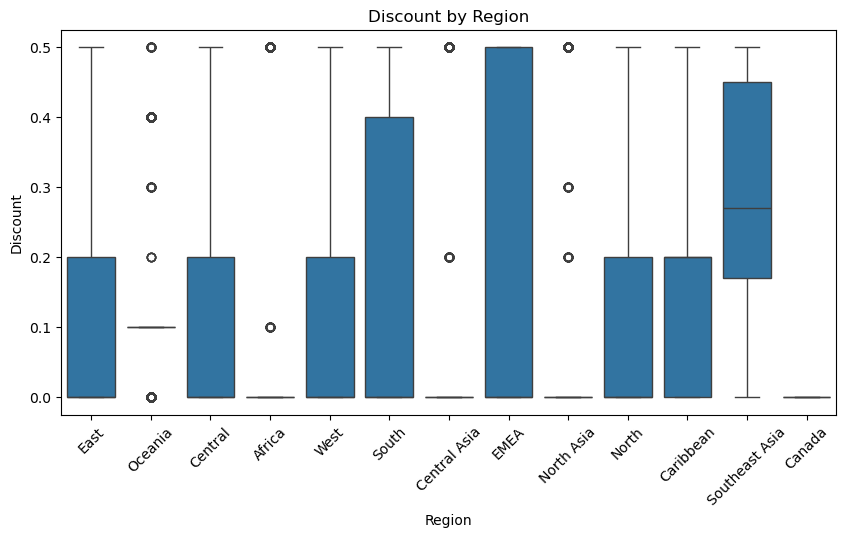

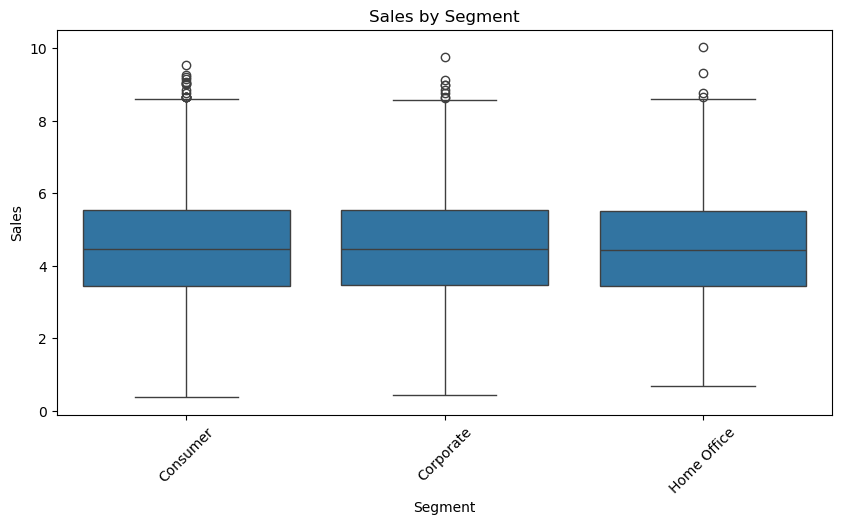

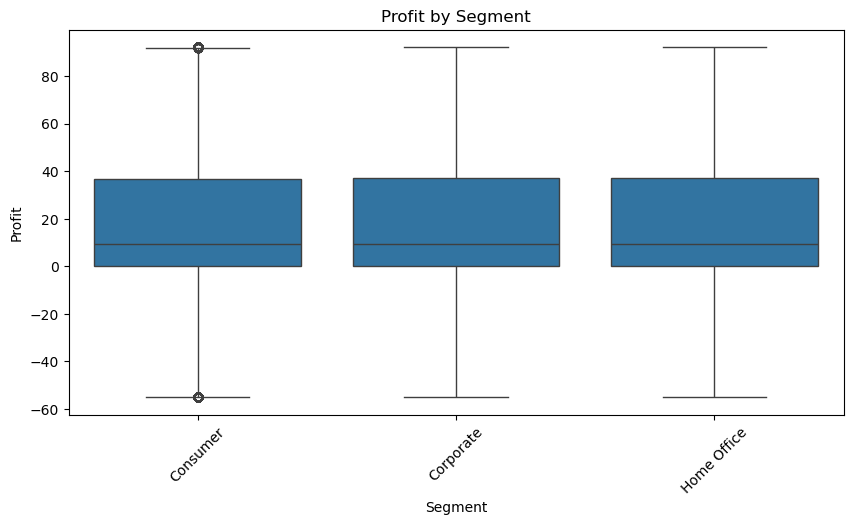

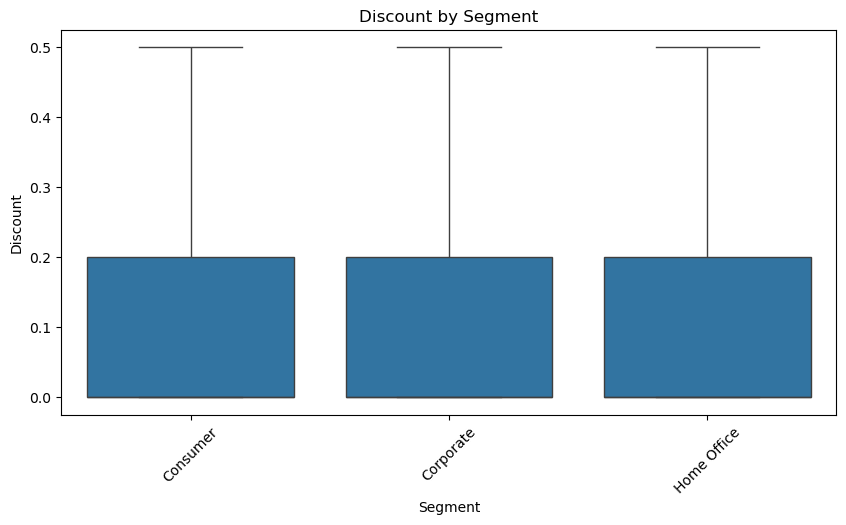

In [47]:
features = ["Sales", "Profit", "Discount"]
groups = ["Category", "Region", "Segment"]

for g in groups:
    for f in features:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=g, y=f, data=df)
        plt.title(f"{f} by {g}")
        plt.xticks(rotation=45)
        plt.show()

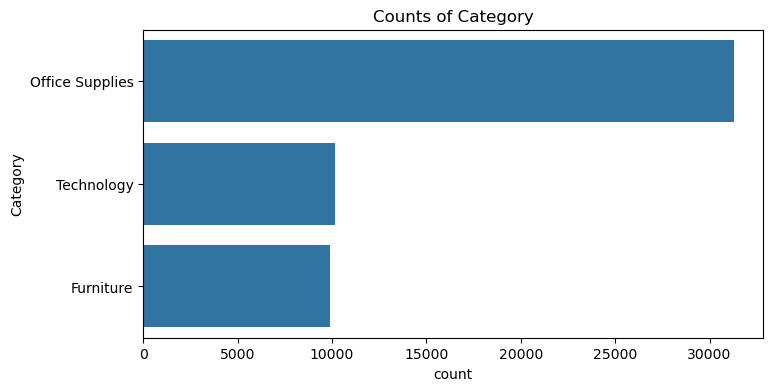

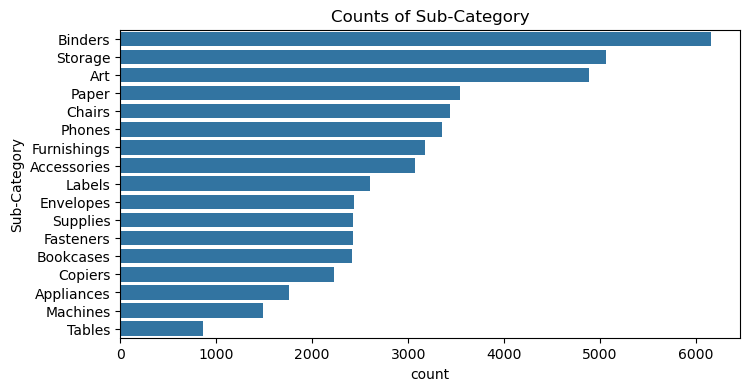

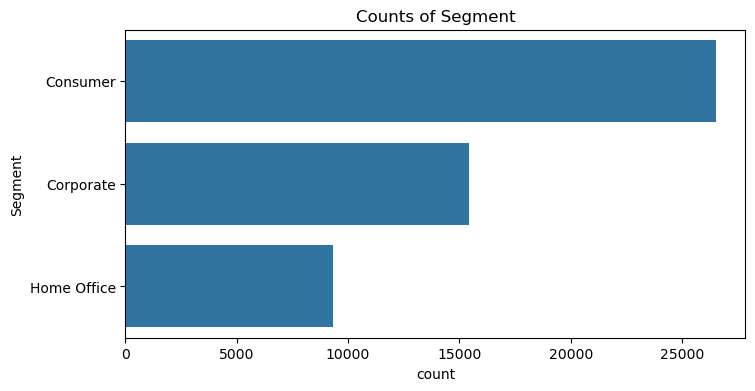

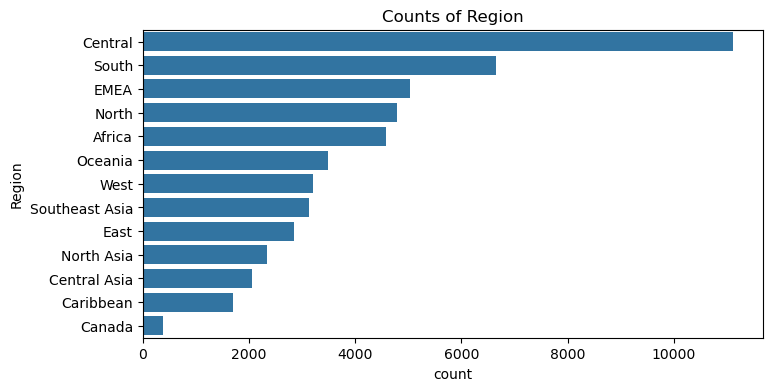

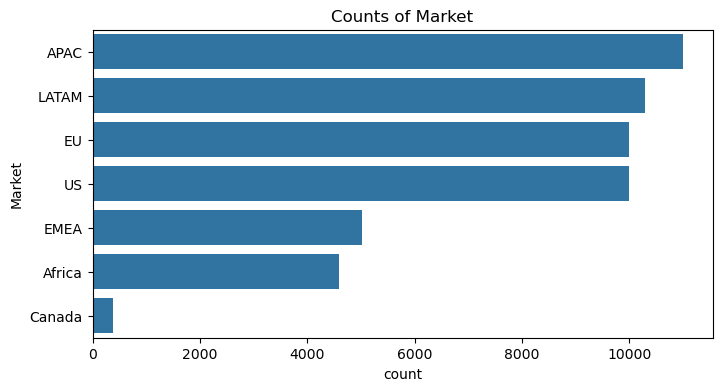

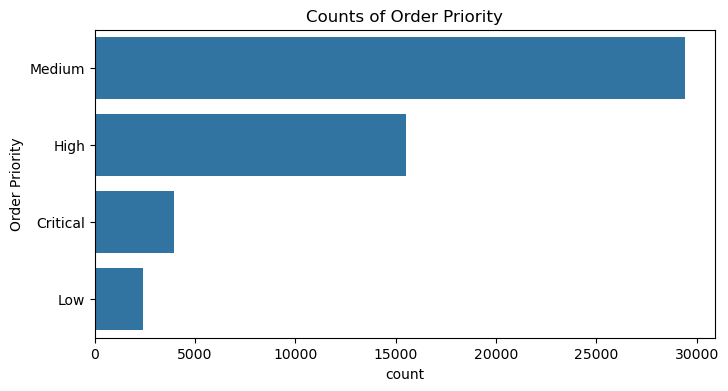

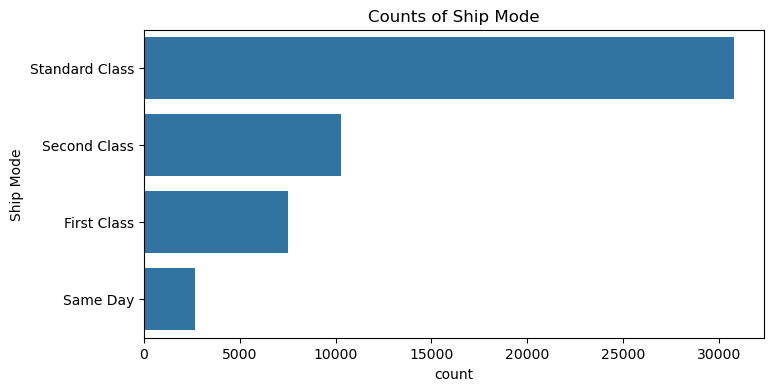

In [48]:
cat_cols = ["Category", "Sub-Category", "Segment", "Region", "Market", "Order Priority", "Ship Mode"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()


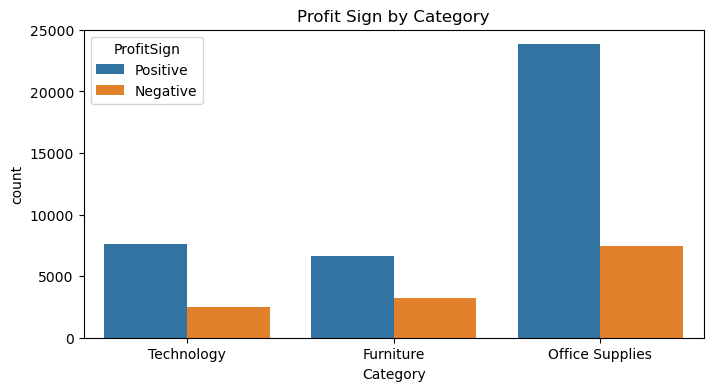

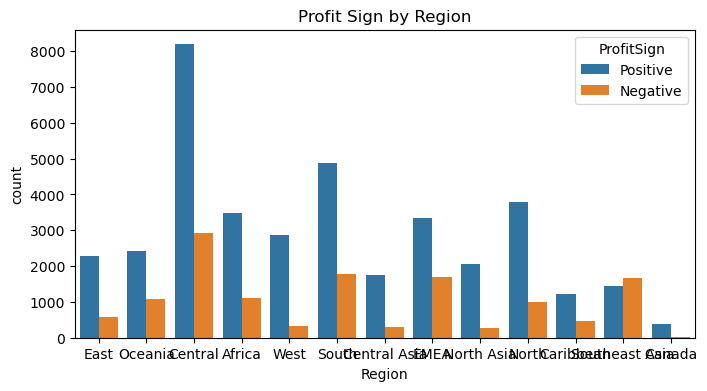

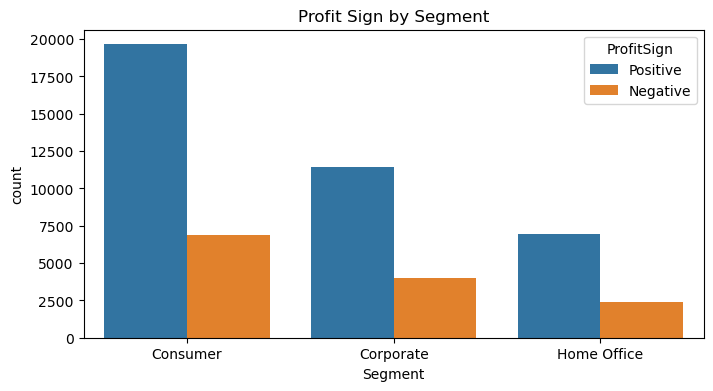

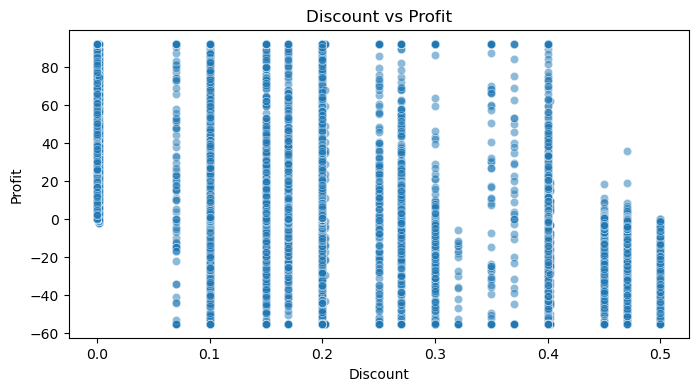

In [49]:
df["ProfitSign"] = df["Profit"].apply(lambda x: "Positive" if x > 0 else "Negative")

for cat in ["Category", "Region", "Segment"]:
    plt.figure(figsize=(8,4))
    sns.countplot(x=cat, hue="ProfitSign", data=df)
    plt.title(f"Profit Sign by {cat}")
    plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.show()


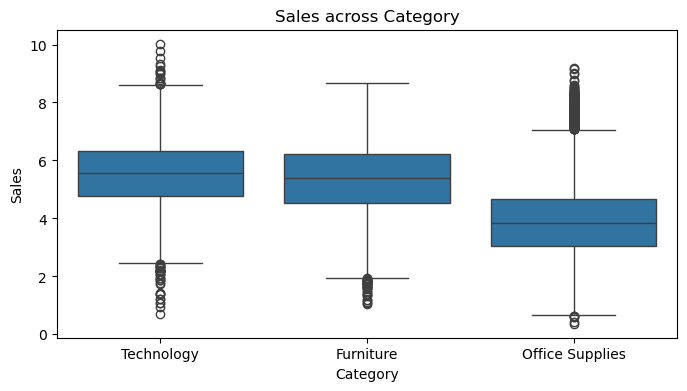

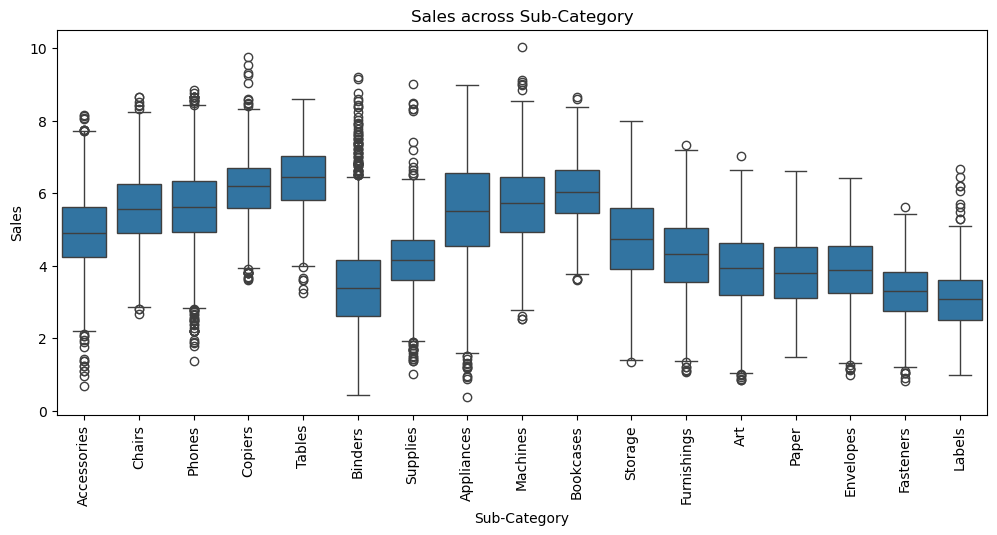

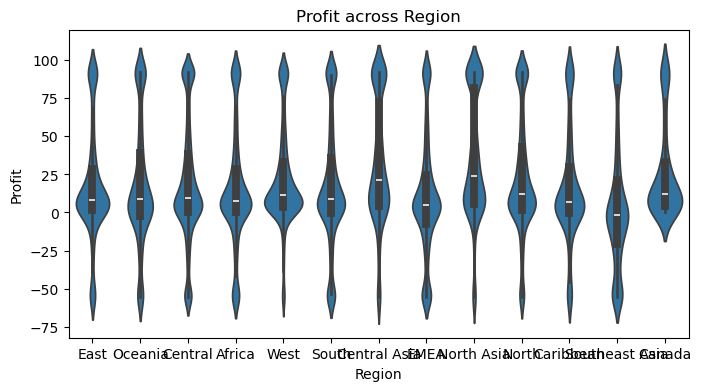

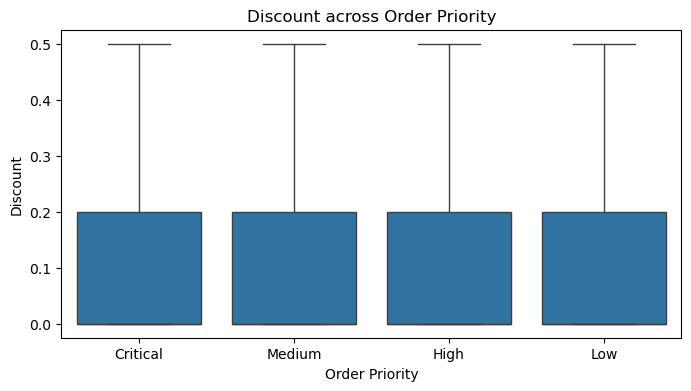

In [50]:

plt.figure(figsize=(8,4))
sns.boxplot(x="Category", y="Sales", data=df)
plt.title("Sales across Category")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="Sub-Category", y="Sales", data=df)
plt.xticks(rotation=90)
plt.title("Sales across Sub-Category")
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x="Region", y="Profit", data=df)
plt.title("Profit across Region")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="Order Priority", y="Discount", data=df)
plt.title("Discount across Order Priority")
plt.show()


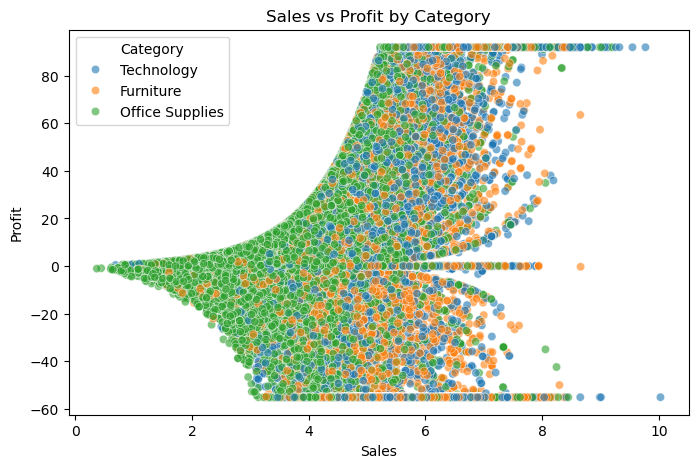

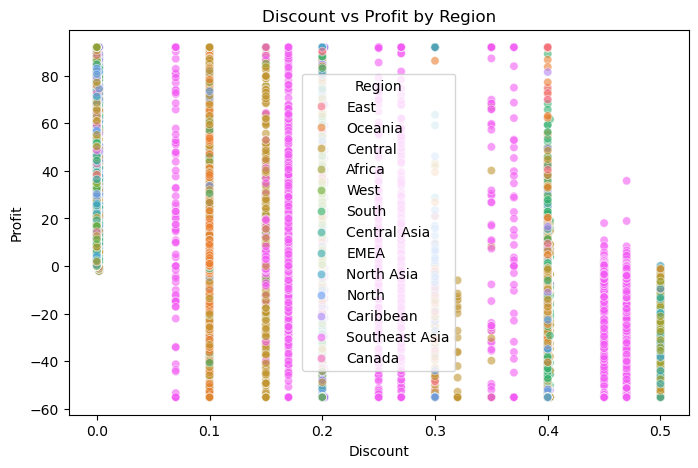

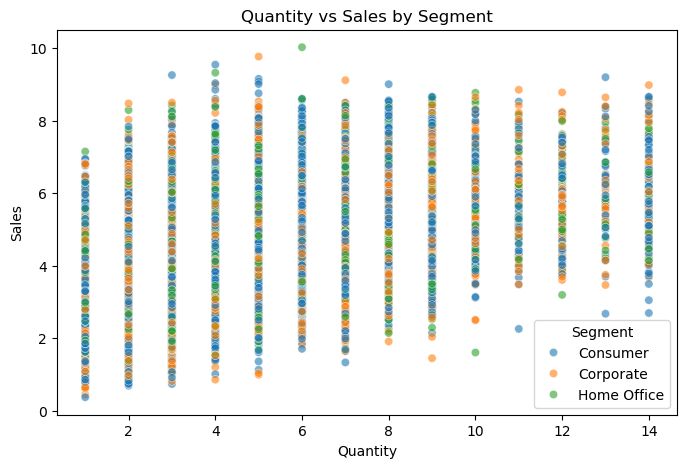

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales", y="Profit", hue="Category", data=df, alpha=0.6)
plt.title("Sales vs Profit by Category")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="Discount", y="Profit", hue="Region", data=df, alpha=0.6)
plt.title("Discount vs Profit by Region")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="Quantity", y="Sales", hue="Segment", data=df, alpha=0.6)
plt.title("Quantity vs Sales by Segment")
plt.show()


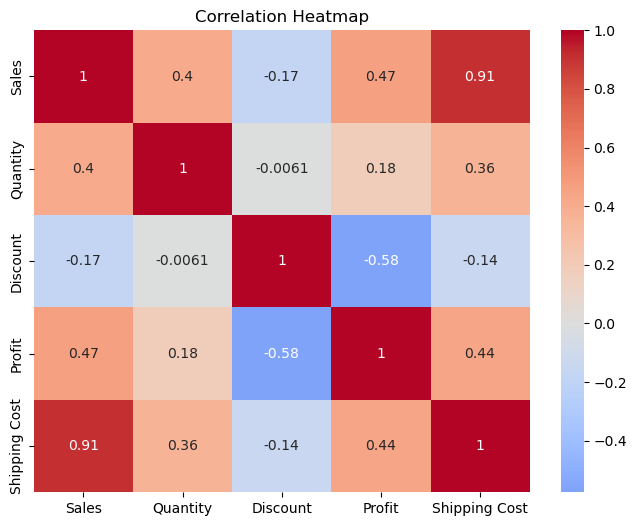

In [52]:
corr_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


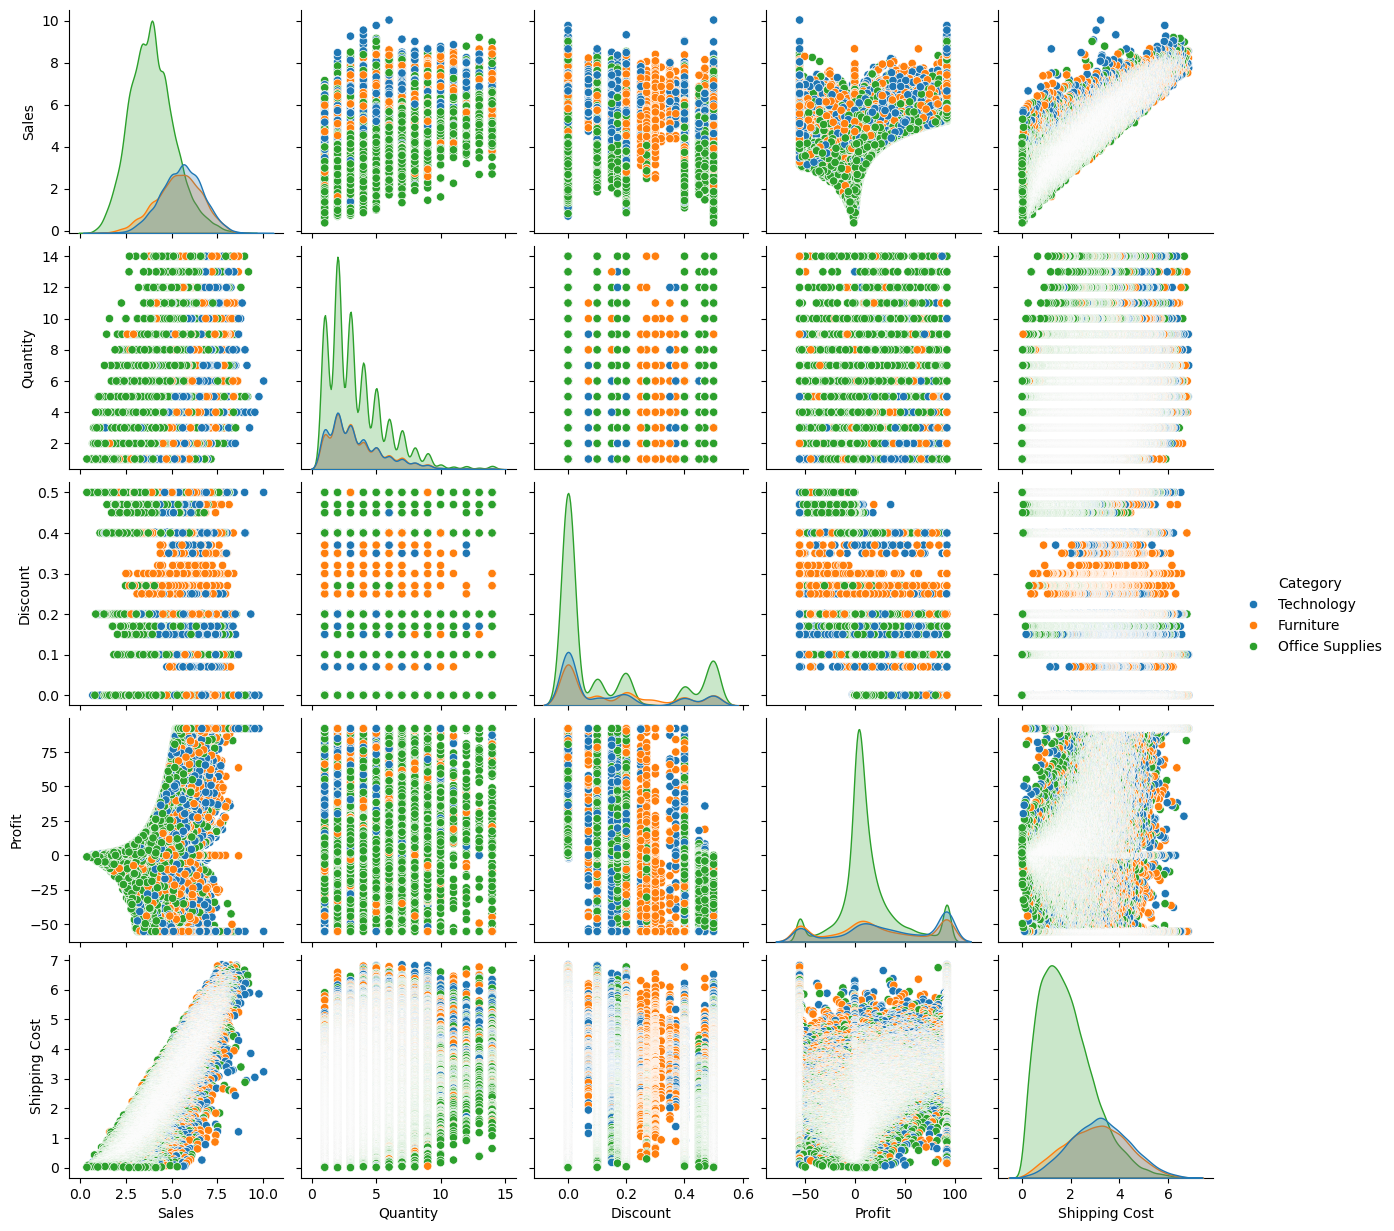

In [53]:
sns.pairplot(df[["Sales", "Quantity", "Discount", "Profit", "Shipping Cost", "Category"]],
             hue="Category", diag_kind="kde")
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X=test.drop('Sales',axis=1)
y=test['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [56]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [57]:
y_pred = gb_model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

MAE: 0.23
MSE: 0.09
RMSE: 0.31
R²: 0.955


In [58]:
import pickle

# Save your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)